In [2]:
from nbindex import floating
floating.tableofcontent()

# Database operations 2. 
* **concat, join, apply, pivot**


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['floating']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import pandas as pd

Reading the examination data again:

In [5]:
df=pd.read_csv("data/examination.csv.gz",sep=";")

We create a smaller table that is easier to rewad for demonstration purposes.

In [6]:
subdf=df[['city','school_type',
          'gender','level','points_written']].head(2)

## Concatenation

We can concatenate two `DataFrame`s, if we give a list containing `DataFrame`s with the same number of columns to the `pd.concat()` function.

In our example, we write the same `DataFrame` two times under each other.

In [7]:
cdf=pd.concat([subdf,subdf])
cdf

,city,school_type,gender,level,points_written
0,Budapest,comprehensive,male,normal,NaN
1,Budapest,comprehensive,female,normal,NaN
0,Budapest,comprehensive,male,normal,NaN
1,Budapest,comprehensive,female,normal,NaN


The indices of the newly created table sill come form the original `DataFrame`s.

In [8]:
cdf.loc[0]

,city,school_type,gender,level,points_written
0,Budapest,comprehensive,male,normal,NaN
0,Budapest,comprehensive,male,normal,NaN


We can make a new index, while also keeping the old ones.

In [9]:
cdf=pd.concat([subdf,subdf]).reset_index()
cdf

,index,city,school_type,gender,level,points_written
0,0,Budapest,comprehensive,male,normal,NaN
1,1,Budapest,comprehensive,female,normal,NaN
2,0,Budapest,comprehensive,male,normal,NaN
3,1,Budapest,comprehensive,female,normal,NaN


Or we could throw them away.

In [10]:
cdf=pd.concat([subdf,subdf]).reset_index(drop=True)
cdf

,city,school_type,gender,level,points_written
0,Budapest,comprehensive,male,normal,NaN
1,Budapest,comprehensive,female,normal,NaN
2,Budapest,comprehensive,male,normal,NaN
3,Budapest,comprehensive,female,normal,NaN


We can concatenate tables along the other axis as well.

In [11]:
df1=pd.DataFrame(np.ones((2,2)))
df2=pd.DataFrame(2*np.ones((2,2)))

pd.concat([df1,df2],axis=1)

,0,1,0,1
0,1.0,1.0,2.0,2.0
1,1.0,1.0,2.0,2.0


Then, `concat` uses the indices to copy the `DataFrame`s next to each other.

In [12]:
df1=pd.DataFrame(np.ones((2,2)))
df2=pd.DataFrame(2*np.ones((2,2)),index=[3,4])

pd.concat([df1,df2],axis=1)

,0,1,0,1
0,1.0,1.0,NaN,NaN
1,1.0,1.0,NaN,NaN
3,NaN,NaN,2.0,2.0
4,NaN,NaN,2.0,2.0


## Joins

If we have a common identifier or columns with common values in two tables, it is possible to merge them. For example, we can take two columns from both tables, and we put those rows next to each other, where the value of these two columns is the same.

###  Inner Join

We omit those lines that do not have a pair in the other table.

We read a data series about cities downloaded from KSH.

In [13]:
h=pd.read_csv('data/settlements.csv')
h.head()

,Name,KSH code,Type,County,LAU1 code,LAU1 name,LAU1 center,Common municipality code,Common municipality center,Area (ha),Population,Number of living units
0,Aba,17376,város,Fejér,850.0,Székesfehérvári,Székesfehérvár,1,–,8805,4424,1546
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,1640.0,Kunhegyesi,Kunhegyes,2,Helyben – Locally,13223,4160,2038
2,Abaliget,12548,község,Baranya,280.0,Pécsi,Pécs,5,Orfű,1609,649,241
3,Abasár,24554,község,Heves,1060.0,Gyöngyösi,Gyöngyös,1,–,2082,2493,1188
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,570.0,Gönci,Gönc,6,Boldogkőváralja,848,59,58


Let's plot the points achieved as a function of the city population.

We merge the two tables by assigning the row from the KSH data to each examination based on the name of the city.

In [14]:
mdf=df.merge(h,how='inner',
             left_on='city',
             right_on='Name')
mdf.head()

,county,city,yeargroup,school_type,gender,education_type,subject,level,exam_type,language,...,Type,County,LAU1 code,LAU1 name,LAU1 center,Common municipality code,Common municipality center,Area (ha),Population,Number of living units
0,Budapest,Budapest,12.0,comprehensive,male,day,physics,normal,forwarded,hungarian,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
1,Budapest,Budapest,12.0,comprehensive,female,day,physics,normal,forwarded,hungarian,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
2,Budapest,Budapest,12.0,comprehensive,male,day,physics,normal,forwarded,hungarian,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
3,Budapest,Budapest,13.0,comprehensive,female,day,physics,normal,forwarded,hungarian,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
4,Budapest,Budapest,12.0,comprehensive,male,day,physics,normal,forwarded,hungarian,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502


We exclude Budapest, beacuse it is too big.

In [15]:
mdf=mdf[mdf['city']!='Budapest']

We load seaborn for this plot.

In [16]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In the written examinations, larger cities perform significantly better.

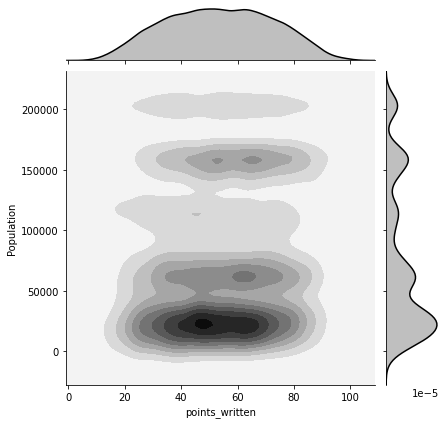

In [17]:
x,y='points_written','Population'
sns.jointplot(x=x, y=y, data=mdf,kind="kde", color="k")

But in the oral examination part, smaller places do better...

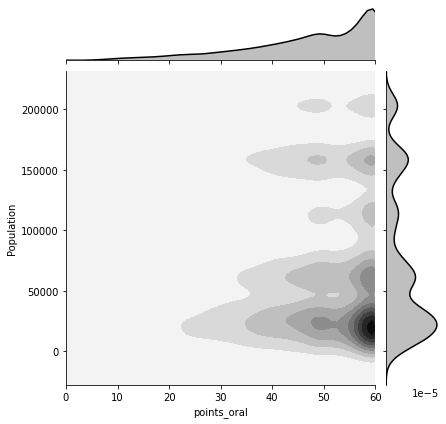

In [18]:
x,y='points_oral','Population'
sns.jointplot(x=x, y=y, data=mdf,kind="kde", color="k",xlim=(0,60))

### Left join

We can also merge two tables by using all of the rows from one table, and where the second table has no corresponding rows, we still leave the original row in the resulting table.

For example, we can look for cities where there has been no Physics exam in 2014 (or where it is not in our data).

First, we look for cities where there was an examination.

In [19]:
df14=df[df['year']==2014]
fizcit=df14[['city']].drop_duplicates().reset_index(drop=True)
fizcit.head()

,city
0,Budapest
1,Pécs
2,Kiskunhalas
3,Kecskemét
4,Kalocsa


Next, we look for all possible cities.

In [20]:
# város means city
allcit=h[h['Type']=='város'][
    ['Name']].reset_index(drop=True)
allcit.head()

,Name
0,Aba
1,Abádszalók
2,Abaújszántó
3,Abony
4,Ács


Then, we merge them such that we keep all existing cities.

In [21]:
lj=allcit.merge(fizcit,how='left',right_on='city',
                left_on='Name')
lj

,Name,city
0,Aba,NaN
1,Abádszalók,NaN
2,Abaújszántó,NaN
3,Abony,NaN
4,Ács,NaN
...,...,...
317,Zalalövő,NaN
318,Zalaszentgrót,Zalaszentgrót
319,Zamárdi,NaN
320,Zirc,Zirc


We look for cities, where the value of the examination table is lacking.

In [22]:
lj[pd.isnull(lj['city'])]

,Name,city
0,Aba,NaN
1,Abádszalók,NaN
2,Abaújszántó,NaN
3,Abony,NaN
4,Ács,NaN
...,...,...
315,Záhony,NaN
316,Zalakaros,NaN
317,Zalalövő,NaN
319,Zamárdi,NaN


#### Further join possibilities
- Right outer (keeping all the rows from the right table)
- Full outer (keeping all the rows from both tables)
- Cross join, Cartesian product (there are only hacked solutions in pandas)

#### Weaknesses

We can only join on concrete values, we cannot use any transformation functions such as 'give me the rows where the absolute value of the x column in table A minus the absolute value of the y column of table B is less than 5'. Though this operation would be trivial in SQL. If we need such a thing, we have to turn to the package `sqlite`.

## Contains

If we have to took whether a character string is in the elements of a string columns:

In [23]:
df[df["city"].str.contains("Buda")].tail()['city']

21602     Budaörs
21631     Budaörs
21632    Budapest
21642     Budaörs
21643     Budaörs
Name: city, dtype: object

## Apply

If we want to use an arbitrary function to each and every element of a column, we can do it by using `apply`. We write the function that we wany to use into the brackets after apply.

First we define a function that adds 1 to an arbitrary number:

In [24]:
def hozzaad(x):
    return x+1

Then, we build houses.

In [23]:
h['Number of living units'].head()

0    1546
1    2038
2     241
3    1188
4      58
Name: Number of living units, dtype: int64

In [24]:
h['Number of living units'].apply(hozzaad).head()

# with lambda function
# h['Number of living units'].apply(lambda x: x+1).head()

0    1547
1    2039
2     242
3    1189
4      59
Name: Number of living units, dtype: int64

We can use `apply` rowwise if we use the `axis=1` keyword. For example, let us write a normalization function by hand, that divides a row by the sum of its elements. This function will be very slow!

In [25]:
def norm(sor):
    return sor/sor.sum()

In [26]:
df[['points_written','points_oral']].apply(norm,axis=1).head()

,points_written,points_oral
0,NaN,NaN
1,NaN,NaN
2,0.589041,0.410959
3,0.377049,0.622951
4,0.523810,0.476190


## Pivot

We can easily rearrange our table even when we had only column-wise values. Now we want to have a look at the median of the points of the written examination for each county in each year.

In [27]:
df.pivot_table(values='points_written',
               columns='year',
               index='county',
               aggfunc=np.median)

year,2011,2012,2013,2014,2015
county,,,,,
Baranya,83.0,54.0,57.0,55.0,53.0
Borsod-Abaúj-Zemplén,67.5,51.0,58.0,54.0,52.0
Budapest,74.0,59.0,60.0,61.0,61.0
Bács-Kiskun,77.5,49.5,55.0,56.5,54.0
Békés,78.0,42.0,50.0,47.0,50.0
Csongrád,78.0,53.0,59.0,59.0,56.0
Fejér,79.5,47.0,57.0,51.5,48.0
Gyõr-Moson-Sopron,81.0,52.0,59.0,63.0,56.0
Hajdú-Bihar,68.5,42.0,55.0,54.0,57.0
